# Clase 6

### Inferencias de modelos LLM
Para realizar inferencias con modelos de lenguaje grande (LLM), tenemos dos opciones principales:

#### 1) Usar una API:
  Conectarnos a un servidor que ofrezca una API para realizar inferencias. Esta opción es conveniente porque no requiere que descarguemos el modelo localmente, lo que ahorra recursos computacionales y simplifica el proceso de implementación.

#### 2) Descargar el modelo:
  Descargar el modelo y realizar inferencias localmente. Esta opción puede ser más adecuada si necesitamos personalizar el modelo o si planeamos realizar múltiples inferencias sin depender de una conexión a internet.


### Llama
Llama es un modelo de lenguaje desarrollado por Meta AI, diseñado para la generación y comprensión del lenguaje natural. Utiliza una arquitectura de red neuronal profunda que permite una generación de texto coherente y contextualizada, lo que lo hace adecuado para diversas aplicaciones de procesamiento del lenguaje natural. Llama se caracteriza por su capacidad de realizar inferencias rápidas, lo que es esencial para aplicaciones en tiempo real, y su naturaleza de código abierto permite a los desarrolladores personalizar el modelo según sus necesidades, fomentando la innovación en el campo de la inteligencia artificial.


### Accesso Llama
* Download + Self Host (i.e. [download Llama](https://ai.meta.com/resources/models-and-libraries/llama-downloads))
* Hosted API Platform (e.g. [Groq](https://console.groq.com/), [Replicate](https://replicate.com/meta/meta-llama-3-8b-instruct), [Together](https://api.together.xyz/playground/language/meta-llama/Llama-3-8b-hf), [Anyscale](https://app.endpoints.anyscale.com/playground))

* Hosted Container Platform (e.g. [Azure](https://techcommunity.microsoft.com/t5/ai-machine-learning-blog/introducing-llama-2-on-azure/ba-p/3881233), [AWS](https://aws.amazon.com/blogs/machine-learning/llama-2-foundation-models-from-meta-are-now-available-in-amazon-sagemaker-jumpstart/), [GCP](https://console.cloud.google.com/vertex-ai/publishers/google/model-garden/139))

### Casos de uso
* Generación de contenidos
* Resumenes
* General Chatbots
* RAG (Retrieval Augmented Generation): Chat con tus propios datos
* Fine-tuning
* Agents

### Referencias
* [Meta Llama 3.1 Blog](https://ai.meta.com/blog/meta-llama-3-1/)
* [Getting Started with Meta Llama](https://llama.meta.com/docs/get-started)

## 1.1) Groq
Groq is Fast AI Inference, es una empresa de tecnología que se especializa en el diseño de hardware y software para la aceleración del procesamiento de datos mediante arquitecturas avanzadas de inteligencia artificial (IA). Su enfoque se centra en ofrecer soluciones de computación de alto rendimiento, optimizando la inferencia de modelos de aprendizaje automático a través de unidades de procesamiento específicas (LPU). Esto permite a las empresas realizar inferencias más rápidas y eficientes, facilitando la integración de modelos de IA en aplicaciones mediante su API, que simplifica el proceso de implementación en entornos de producción.


Crear API Grop

1. Ir a: https://console.groq.com/login
2. Crear una cuenta (seguir los pasos de la plataforma)
3. Ir al menu lateral "API Keys" - "Create API Key"
4. Definir un nombre identificativo
5. Copiar la clave y guardar


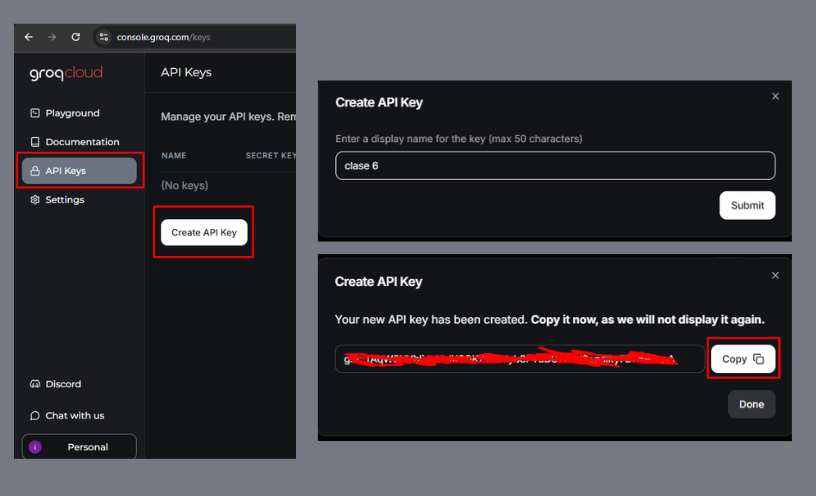

In [ ]:
# APIS Grop para pruebas
# groq_api_key = os.getenv("GROQ_API_KEY", "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")
# groq_api_key = os.getenv("GROQ_API_KEY", "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")
# groq_api_key = os.getenv("GROQ_API_KEY", "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")
# groq_api_key = os.getenv("GROQ_API_KEY", "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")

In [ ]:
import warnings

# Ignorar todos los warnings
warnings.filterwarnings("ignore")

# O, para ignorar solo los warnings de tipo UserWarning
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
!pip install groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 3.9 MB/s eta 0:00:00


In [ ]:
import os
from groq import Groq

# Configurar la clave de API de Groq
groq_api_key = os.getenv("GROQ_API_KEY", "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")

# Crear un cliente para Groq
client = Groq(
    api_key=groq_api_key
)

# Función para realizar inferencia con el modelo de Groq
def inferencia_con_groq(prompt, temperature=0.7, max_tokens=1000, top_p=1.0, frequency_penalty=0.0, presence_penalty=0.0, model="llama3-groq-70b-8192-tool-use-preview"):
    try:
        # Crear una solicitud de inferencia con el modelo seleccionado
        chat_completion = client.chat.completions.create(
            messages=[
                {
                    "role": "system",
                    "content": "Eres un experto en inteligencia artificial aplicada a la salud."
                },
                {
                    "role": "user",
                    "content": prompt,
                }
            ],
            model=model,  # Modelo que deseas usar
            max_tokens=max_tokens,  # Número máximo de tokens en la respuesta
            temperature=temperature,  # Control de creatividad
            top_p=top_p,  # Nucleus sampling (amplia diversidad de las respuestas)
            frequency_penalty=frequency_penalty,  # Penaliza la repetición de palabras
            presence_penalty=presence_penalty  # Promueve la introducción de nuevas ideas
        )

        # Devolver la respuesta generada por el modelo
        return chat_completion.choices[0].message.content

    except Exception as e:
        print(f"Error al generar respuesta: {e}")
        return None

# Ejemplo de uso
if __name__ == "__main__":
    prompt = "Describe las aplicaciones de los modelos de lenguaje en el campo de la salud."

    # Realizar la inferencia con parámetros personalizados
    respuesta = inferencia_con_groq(prompt, temperature=0.5, max_tokens=500, top_p=0.9, frequency_penalty=0.1, presence_penalty=0.1, model="llama3-groq-70b-8192-tool-use-preview")

    if respuesta:
        print("Respuesta generada por el modelo:")
        print(respuesta)
    else:
        print("No se pudo generar una respuesta.")


Respuesta generada por el modelo:
Los modelos de lenguaje en el campo de la salud tienen un amplio rango de aplicaciones, incluyendo:

1. Análisis de texto: Los modelos de lenguaje se utilizan para analizar textos de informes clínicos, diarios de pacientes y revisiones de literatura médica para extraer información relevante, identificar patrones y tendencias, y facilitar la toma de decisiones.

2. Diagnóstico asistido por IA: Los modelos de lenguaje se utilizan para ayudar a los médicos a diagnosticar condiciones utilizando la información contenida en los informes clínicos y la literatura médica.

3. Generación de informes clínicos: Los modelos de lenguaje pueden ayudar a los médicos a generar informes clínicos más precisos y completos, reduciendo el tiempo y la carga de trabajo.

4. Chatbots y asistentes virtuales: Los modelos de lenguaje se utilizan en chatbots y asistentes virtuales para brindar respuestas a preguntas de pacientes, ayudar a programar citas y proporcionar consejos de

In [ ]:
import os
from groq import Groq
import json

# Función para generar 10 chistes y almacenarlos en un archivo JSON
def generar_chistes(n_chistes=10, output_file="chistes_sinteticos.json"):
    chistes = []
    prompt = "Cuéntame un chiste divertido, sobre informatica."

    for i in range(n_chistes):
        print(f"Generando chiste {i+1}/{n_chistes}...")
        chiste = inferencia_con_groq(prompt, temperature=0.5, max_tokens=500, top_p=0.9, frequency_penalty=0.1, presence_penalty=0.1, model="llama3-groq-70b-8192-tool-use-preview")

        if chiste:
            print(f"Chiste {i+1}: {chiste}\n")  # Imprime el chiste bien formateado
            chistes.append({"chiste": chiste})  # Guarda el chiste en la lista
        else:
            print(f"No se pudo generar el chiste {i+1}.")

    # Guardar los chistes generados en un archivo JSON
    with open(output_file, "w") as f:
        json.dump(chistes, f, ensure_ascii=False, indent=4)

    print(f"Chistes guardados en {output_file}")

# Ejemplo de uso
if __name__ == "__main__":
    # Generar 10 chistes y almacenarlos en un archivo
    generar_chistes(n_chistes=10, output_file="chistes_sinteticos.json")

Generando chiste 1/10...
Chiste 1: ¿Por qué los programadores no se casan? Porque no pueden resistir el impulso de cambiar sus esposas a "Beta" para ver si mejoran.

Generando chiste 2/10...
Chiste 2: ¿Por qué el programador de computadoras no podía ir a la fiesta?

Porque estaba en un loop infinito.

Generando chiste 3/10...
Chiste 3: ¿Por qué el ordenador se fue al psicólogo? 

Porque tenía un problema de hardware y necesitaba ayuda para procesar sus pensamientos.

Generando chiste 4/10...
Chiste 4: ¿Por qué los ordenadores no van al gimnasio? Porque no quieren hacer push-ups, prefieren hacer pull-requests.

Generando chiste 5/10...
Chiste 5: ¿Por qué el programador no podía ir a la fiesta? 

Porque estaba ocupado debuggeando su vida.

Generando chiste 6/10...
Chiste 6: ¿Por qué no le gustan a los programadores de informática los aviones?

Porque no hay suficientes puertos USB.

Generando chiste 7/10...
Chiste 7: ¿Por qué la computadora no se ríe de los chistes de informática?

Porqu

In [ ]:
# TODO 1: Cambiar el rol del asistente a experto en física teórica y
# responder una pregunta común, ejemplo ¿Qué es la relatividad general?.

# TODO 2: Cambiar el rol del asistente a experto en biología molecular y responder la misma pregunta.

# TODO 3: Comparar las respuestas generadas para la misma pregunta en diferentes roles.
# Encuentras diferencias significativas en las explicaciones basadas en el contexto de cada rol.

# TODO 4: Ajustar la temperatura para respuestas más deterministas.

# TODO 5: Aumentar el número máximo de tokens para respuestas más largas.

# TODO 6: Ajustar top_p para respuestas más centradas.

# TODO 7: Añadir penalización por frecuencia para evitar repeticiones.

# TODO 8: Añadir penalización por presencia para fomentar ideas nuevas.

# TODO 9: Generar 100 preguntas de examen, con sus repuestas, generadas con el asistente configurado como un experto en inteligencia artificial.
# Luego guarda en un archivo json

# TODO 10: Generación en contexto narrativo: Crear un contexto narrativo inicial y pedir al modelo que continúe la historia, probando cómo responde al introducir cambios bruscos de tono o tema.

# TODO 11: Prueba en varios idiomas: Pedirle al modelo que responda la misma pregunta en diferentes idiomas (ejemplo: inglés, español, francés) y comparar la calidad y consistencia de las respuestas.

# TODO 12: Probar diferentes modelos, puede ver la lista de modelos soportados por GroqCloud en su plataforma
